In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

In [2]:
##easy straight forward function to calculate charge changing cross section without any corrections
def cccs(filename,target_thickness):
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","incoming ions","survived_ions"])
    df["d_survived"] = 1-df["survived_ions"]/df["incoming ions"]
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    cc_2198_val = []
    cc_1086_val = []
    cc_54_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
        dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))

        cc_2198 = factor_2198*(-math.log(dz_2198))
        cc_1086 = factor_1086*(-math.log(dz_1086))
        cc_54 = factor_54*(-math.log(dz_54))
        cc_2198_val.append(cc_2198)
        cc_1086_val.append(cc_1086)
        cc_54_val.append(cc_54)
        
    if (target_thickness == "thin"):
        return cc_54_val
    if (target_thickness == "medium"):
        return cc_1086_val
    if (target_thickness == "thick"):
        return cc_2198_val
    
def cccs_loop(filename,target_thickness):
    column_names = ["datatype","targettype","RunID","energy","incoming ions"]
    for i in range(40):
        column_names.append(f"surv_ion_{i}")
    print(column_names)
    df = pd.read_csv(filename,sep='\t',names=column_names)
    for i in range(40):
        df[f"d_survived_{i}"] = 1-df[f"surv_ion_{i}"]/df["incoming ions"]
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    factor_2198 = (1./T_2198)*(pow(10,27))
    factor_1086 = (1./T_1086)*(pow(10,27))
    factor_54 = (1./T_54)*(pow(10,27))
    cc_2198_val = []
    cc_1086_val = []
    cc_54_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        loop_2198 = []
        loop_1086 = []
        loop_54 = []
        for i in range(40):
            dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            dz_54 = (1-float(df.loc[(df["targettype"] == "c_54") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
            cc_2198 = factor_2198*(-math.log(dz_2198))
            cc_1086 = factor_1086*(-math.log(dz_1086))
            cc_54 = factor_54*(-math.log(dz_54))
            loop_2198.append(cc_2198)
            loop_1086.append(cc_1086)
            loop_54.append(cc_54)
        cc_2198_val.append(loop_2198)
        cc_1086_val.append(loop_1086)
        cc_54_val.append(loop_54)
        
    if (target_thickness == "thin"):
        return cc_54_val
    if (target_thickness == "medium"):
        return cc_1086_val
    if (target_thickness == "thick"):
        return cc_2198_val        

In [3]:
file_gauss2d_border_3_5_sigma = 'comb_gauss2d_border.txt'
file_gauss2d_border_loop = 'comb_loop_gauss2d_border.txt'
file_gauss2d_no_border_3_5_sigma = 'comb_gauss2d_no_border.txt'


cccs_border_3_5_thin = cccs(file_gauss2d_border_3_5_sigma,"thin")
cccs_border_3_5_medium = cccs(file_gauss2d_border_3_5_sigma,"medium")
cccs_border_3_5_thick = cccs(file_gauss2d_border_3_5_sigma,"thick")

cccs_no_border_3_5_thin = cccs(file_gauss2d_no_border_3_5_sigma,"thin")
cccs_no_border_3_5_medium = cccs(file_gauss2d_no_border_3_5_sigma,"medium")
cccs_no_border_3_5_thick = cccs(file_gauss2d_no_border_3_5_sigma,"thick")

tick_target_cccs = cccs_loop(file_gauss2d_border_loop,"thick")
medium_target_cccs = cccs_loop(file_gauss2d_border_loop,"medium")
thin_target_cccs = cccs_loop(file_gauss2d_border_loop,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()

#file_gauss2d_no_border_3_5_sigma = 


/tmp/ipykernel_54546/2161191797.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_54546/2161191797.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_54546/2161191797.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']
['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion

/tmp/ipykernel_54546/2161191797.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_54546/2161191797.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

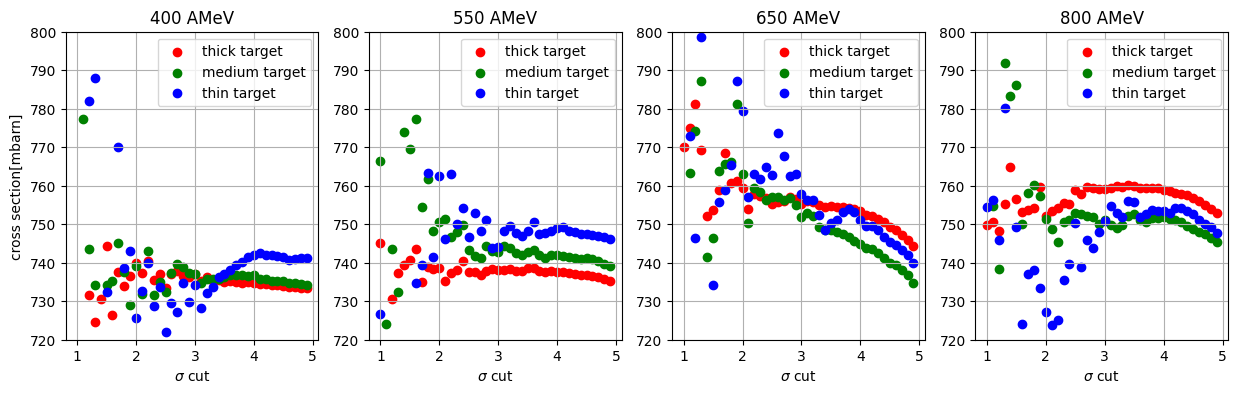

In [4]:
fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
plt.savefig('cccs_vs_sigma_cut.png')

## plot now charge changing cross section with and without border using 2d gaussian fit

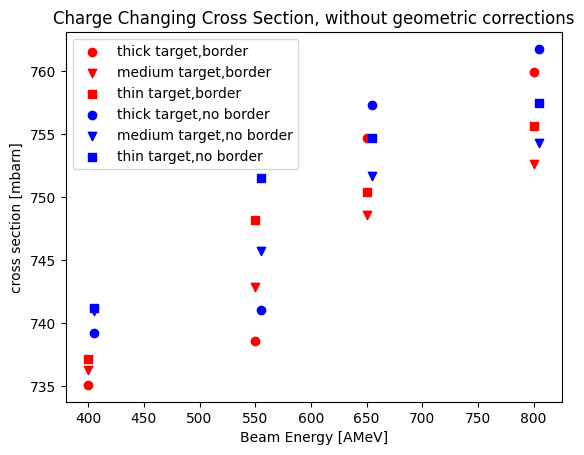

In [5]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick,label="thick target,border",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium target,border",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin target,border",color='red',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,cccs_no_border_3_5_thick,label="thick target,no border",color='blue',marker="o")
ax.scatter(energy,cccs_no_border_3_5_medium,label="medium target,no border",color='blue',marker="v")
ax.scatter(energy,cccs_no_border_3_5_thin,label="thin target,no border",color='blue',marker="s")
ax.legend()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.set_title("Charge Changing Cross Section, without geometric corrections")
plt.savefig('cccs_with_out_border_3_5_sigma.png')

## compare different cut methods: 2d gaussian vs diagonal (with borders)

/tmp/ipykernel_54546/2161191797.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_54546/2161191797.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_54546/2161191797.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54

Text(0.5, 1.0, 'Charge Changing Cross Section, without geometric corrections')

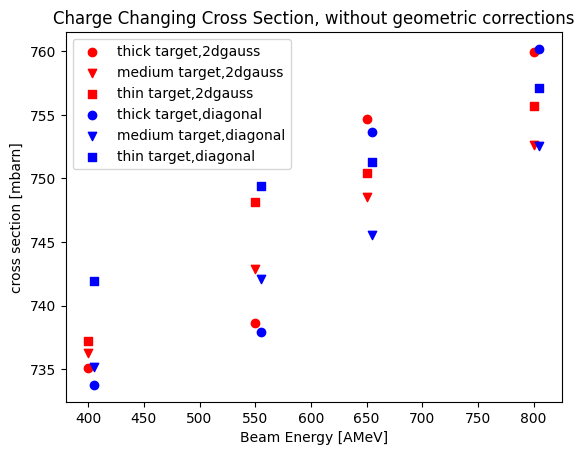

In [6]:
##diagonal cut method
filename_diagonal_3_5_borders = 'comb_diag_with_border_3_5.txt'
diag_cccs_border_3_5_thin = cccs(filename_diagonal_3_5_borders,"thin")
diag_cccs_border_3_5_medium = cccs(filename_diagonal_3_5_borders,"medium")
diag_cccs_border_3_5_thick = cccs(filename_diagonal_3_5_borders,"thick")

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,cccs_border_3_5_thick,label="thick target,2dgauss",color='red',marker="o")
ax.scatter(energy,cccs_border_3_5_medium,label="medium target,2dgauss",color='red',marker="v")
ax.scatter(energy,cccs_border_3_5_thin,label="thin target,2dgauss",color='red',marker="s")
energy = [405,555,655,805]
ax.scatter(energy,diag_cccs_border_3_5_thick,label="thick target,diagonal",color='blue',marker="o")
ax.scatter(energy,diag_cccs_border_3_5_medium,label="medium target,diagonal",color='blue',marker="v")
ax.scatter(energy,diag_cccs_border_3_5_thin,label="thin target,diagonal",color='blue',marker="s")
ax.legend()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("cross section [mbarn]")
ax.set_title("Charge Changing Cross Section, without geometric corrections")
#plt.savefig('cccs_with_out_border_3_5_sigma.png')

## analysis on the sigma cut when using diagonal method

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_54546/2161191797.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_54546/2161191797.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

['datatype', 'targettype', 'RunID', 'energy', 'incoming ions', 'surv_ion_0', 'surv_ion_1', 'surv_ion_2', 'surv_ion_3', 'surv_ion_4', 'surv_ion_5', 'surv_ion_6', 'surv_ion_7', 'surv_ion_8', 'surv_ion_9', 'surv_ion_10', 'surv_ion_11', 'surv_ion_12', 'surv_ion_13', 'surv_ion_14', 'surv_ion_15', 'surv_ion_16', 'surv_ion_17', 'surv_ion_18', 'surv_ion_19', 'surv_ion_20', 'surv_ion_21', 'surv_ion_22', 'surv_ion_23', 'surv_ion_24', 'surv_ion_25', 'surv_ion_26', 'surv_ion_27', 'surv_ion_28', 'surv_ion_29', 'surv_ion_30', 'surv_ion_31', 'surv_ion_32', 'surv_ion_33', 'surv_ion_34', 'surv_ion_35', 'surv_ion_36', 'surv_ion_37', 'surv_ion_38', 'surv_ion_39']


/tmp/ipykernel_54546/2161191797.py:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))][f'd_survived_{i}']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))][f'd_survived_{i}']))
/tmp/ipykernel_54546/2161191797.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["t

Text(0.5, 0.98, 'Analysis of sigma cut for diagonal selection method')

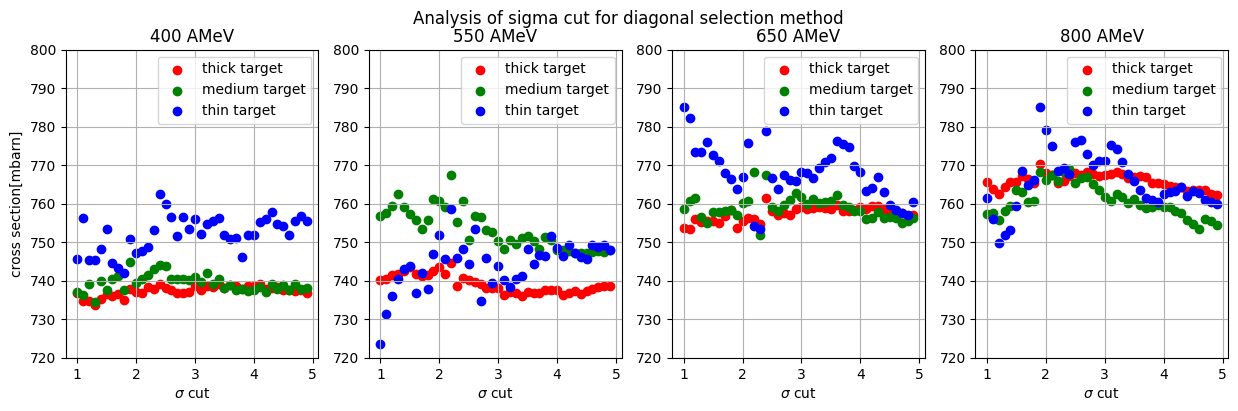

In [9]:
filename_diagonal_3_5_borders_loop = 'comb_loop_diag_with_border.txt'


tick_target_cccs = cccs_loop(filename_diagonal_3_5_borders_loop,"thick")
medium_target_cccs = cccs_loop(filename_diagonal_3_5_borders_loop,"medium")
thin_target_cccs = cccs_loop(filename_diagonal_3_5_borders_loop,"thin")

#thick values
tick_400 = tick_target_cccs[0]
tick_550 = tick_target_cccs[1]
tick_650 = tick_target_cccs[2]
tick_800 = tick_target_cccs[3]

#medium values
medium_400 = medium_target_cccs[0]
medium_550 = medium_target_cccs[1]
medium_650 = medium_target_cccs[2]
medium_800 = medium_target_cccs[3]

#thin values
thin_400 = thin_target_cccs[0]
thin_550 = thin_target_cccs[1]
thin_650 = thin_target_cccs[2]
thin_800 = thin_target_cccs[3]

bins = np.arange(1, 5, 0.1).tolist()



fig, ax = plt.subplots(1,4,figsize=(15,4))
#fig.tight_layout()
ax[0].set_ylim([720,800])
ax[0].scatter(bins,tick_400,label="thick target",color='red',marker="o")
ax[0].scatter(bins,medium_400,label="medium target",color='green',marker="o")
ax[0].scatter(bins,thin_400,label="thin target",color='blue',marker="o")
ax[0].legend()
ax[0].set_title("400 AMeV")
ax[0].set_xlabel(r'$\sigma$ cut')
ax[0].set_ylabel("cross section[mbarn]")

ax[1].set_ylim([720,800])
ax[1].scatter(bins,tick_550,label="thick target",color='red',marker="o")
ax[1].scatter(bins,medium_550,label="medium target",color='green',marker="o")
ax[1].scatter(bins,thin_550,label="thin target",color='blue',marker="o")
ax[1].legend()
ax[1].set_title("550 AMeV")
ax[1].set_xlabel(r'$\sigma$ cut')

ax[2].set_ylim([720,800])
ax[2].scatter(bins,tick_650,label="thick target",color='red',marker="o")
ax[2].scatter(bins,medium_650,label="medium target",color='green',marker="o")
ax[2].scatter(bins,thin_650,label="thin target",color='blue',marker="o")
ax[2].legend()
ax[2].set_title("650 AMeV")
ax[2].set_xlabel(r'$\sigma$ cut')

ax[3].set_ylim([720,800])
ax[3].scatter(bins,tick_800,label="thick target",color='red',marker="o")
ax[3].scatter(bins,medium_800,label="medium target",color='green',marker="o")
ax[3].scatter(bins,thin_800,label="thin target",color='blue',marker="o")
ax[3].legend()
ax[3].set_title("800 AMeV")
ax[3].set_xlabel(r'$\sigma$ cut')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.suptitle("Analysis of sigma cut for diagonal selection method")
#plt.savefig('cccs_vs_sigma_cut.png')

## using different combinations of anodes

### using anode 5-8 and 9-12

In [10]:
file_gauss2d_5_8_9_12_border = "comb_anode_5_8_9_12_gauss2d_border.txt"

middle_anodes_cccs_border_3_5_thin = cccs(file_gauss2d_5_8_9_12_border,"thin")
middle_anodes_cccs_border_3_5_medium = cccs(file_gauss2d_5_8_9_12_border,"medium")
middle_anodes_cccs_border_3_5_thick = cccs(file_gauss2d_5_8_9_12_border,"thick")

/tmp/ipykernel_54546/2161191797.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_2198 = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_54546/2161191797.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_1086 = (1-float(df.loc[(df["targettype"] == "c_1086") & (df["energy"] == float(ene))]['d_survived']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_survived']))
/tmp/ipykernel_54546/2161191797.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dz_54 = (1-float(df.loc[(df["targettype"] == "c_54

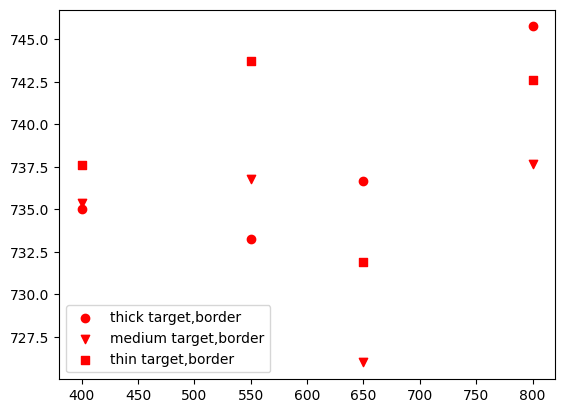

In [12]:
fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
#ax.set_ylim([720,800])
ax.scatter(energy,middle_anodes_cccs_border_3_5_thick,label="thick target,border",color='red',marker="o")
ax.scatter(energy,middle_anodes_cccs_border_3_5_medium,label="medium target,border",color='red',marker="v")
ax.scatter(energy,middle_anodes_cccs_border_3_5_thin,label="thin target,border",color='red',marker="s")
ax.legend()